In [39]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode,iplot
import plotly.graph_objects as go
import plotly.io as pio
init_notebook_mode()
#standard libraries
import numpy as np #linear algebra
import pandas as pd #data processing, I/O operations
import matplotlib.pyplot as plt # Visualization
import matplotlib.dates as mdates #dates format
%matplotlib inline
from math import sqrt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [40]:
from datetime import datetime
#dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')
dateparse = lambda dates:datetime.strptime(dates, '%m/%d/%Y')

In [41]:
#df = pd.read_csv('btcPrice-final.csv',sep=',', parse_dates=['Date'], date_parser=dateparse,  index_col=['Date'],low_memory=False)
# df = pd.read_csv('btcPrice-final.csv',sep=',', index_col=['Date'],low_memory=False,parse_dates = ['Date'],
#                  converters={'Date': lambda x: pd.to_datetime(x).strftime('%Y-%m-%d') })                                       

df = pd.read_csv('btcPrice-final01.csv', sep=',', parse_dates=['Date'], index_col=['Date'], date_parser=dateparse)
df = df.tail(100000)


C:\Users\Rostami_pc\AppData\Local\Temp\ipykernel_18596\2828165073.py:5: FutureWarning:

The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.



In [42]:
df.describe()

Price          Open          High           Low          RSI
count   4651.000000   4651.000000   4651.000000   4651.000000  4452.000000
mean    8924.084928   8917.643217   9155.632101   8653.910213    54.623780
std    14506.749109  14504.120369  14889.518571  14067.248939    16.189629
min        0.000000      0.000000      0.100000      0.000000    10.049198
25%      140.000000    139.800000    145.250000    135.200000    43.791670
50%      909.000000    905.700000    928.000000    870.900000    52.307107
75%     9899.500000   9891.300000  10207.050000   9599.700000    63.908304
max    67528.000000  67528.700000  68990.600000  66334.900000   100.000000

In [43]:
df.head()

Price  Open  High  Low  Vol. Change   RSI      Date2
Date                                                            
2010-07-18      0   0.0   0.1  0.1  0.08   0.00%  NaN  7/18/2010
2010-07-19      0   0.1   0.1  0.1  0.57   0.00%  NaN  7/19/2010
2010-07-20      0   0.1   0.1  0.1  0.26   0.00%  NaN  7/20/2010
2010-07-21      0   0.1   0.1  0.1  0.58   0.00%  NaN  7/21/2010
2010-07-22      0   0.1   0.1  0.1  2.16   0.00%  NaN  7/22/2010

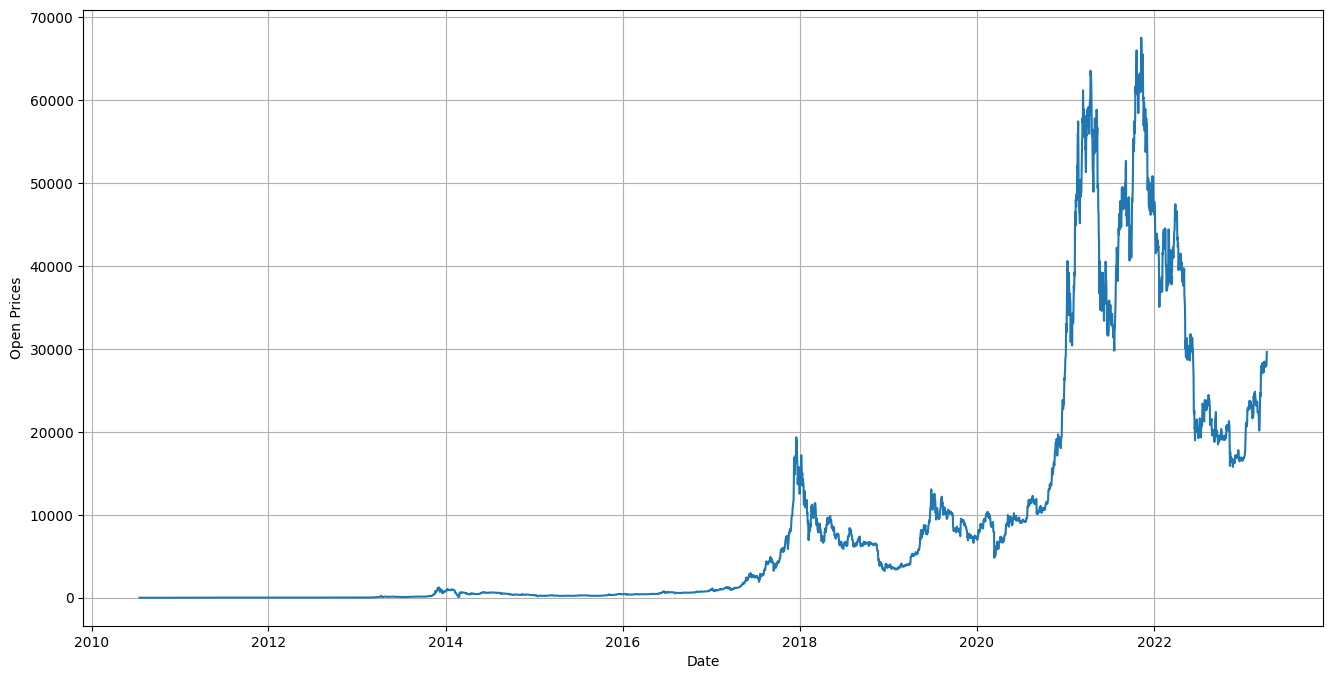

In [44]:
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Open Prices')
plt.plot(df['Open'])
plt.show()

In [45]:
values = pd.DataFrame(df['Open'].values)
dataframe = pd.concat([values, values.shift(1), values.shift(5), values.shift(10), values.shift(30)], axis=1)
dataframe.columns = ['t', 't+1', 't+5', 't+10', 't+30']
dataframe.head(5)

t  t+1  t+5  t+10  t+30
0  0.0  NaN  NaN   NaN   NaN
1  0.1  0.0  NaN   NaN   NaN
2  0.1  0.1  NaN   NaN   NaN
3  0.1  0.1  NaN   NaN   NaN
4  0.1  0.1  NaN   NaN   NaN

In [46]:
result = dataframe.corr()
print(result)

             t       t+1       t+5      t+10      t+30
t     1.000000  0.998989  0.995017  0.989598  0.967367
t+1   0.998989  1.000000  0.996086  0.990730  0.968606
t+5   0.995017  0.996086  1.000000  0.995009  0.973412
t+10  0.989598  0.990730  0.995009  1.000000  0.978632
t+30  0.967367  0.968606  0.973412  0.978632  1.000000


In [47]:
def tsplot(y, lags=None, figsize=(14, 8), stle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout=(2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

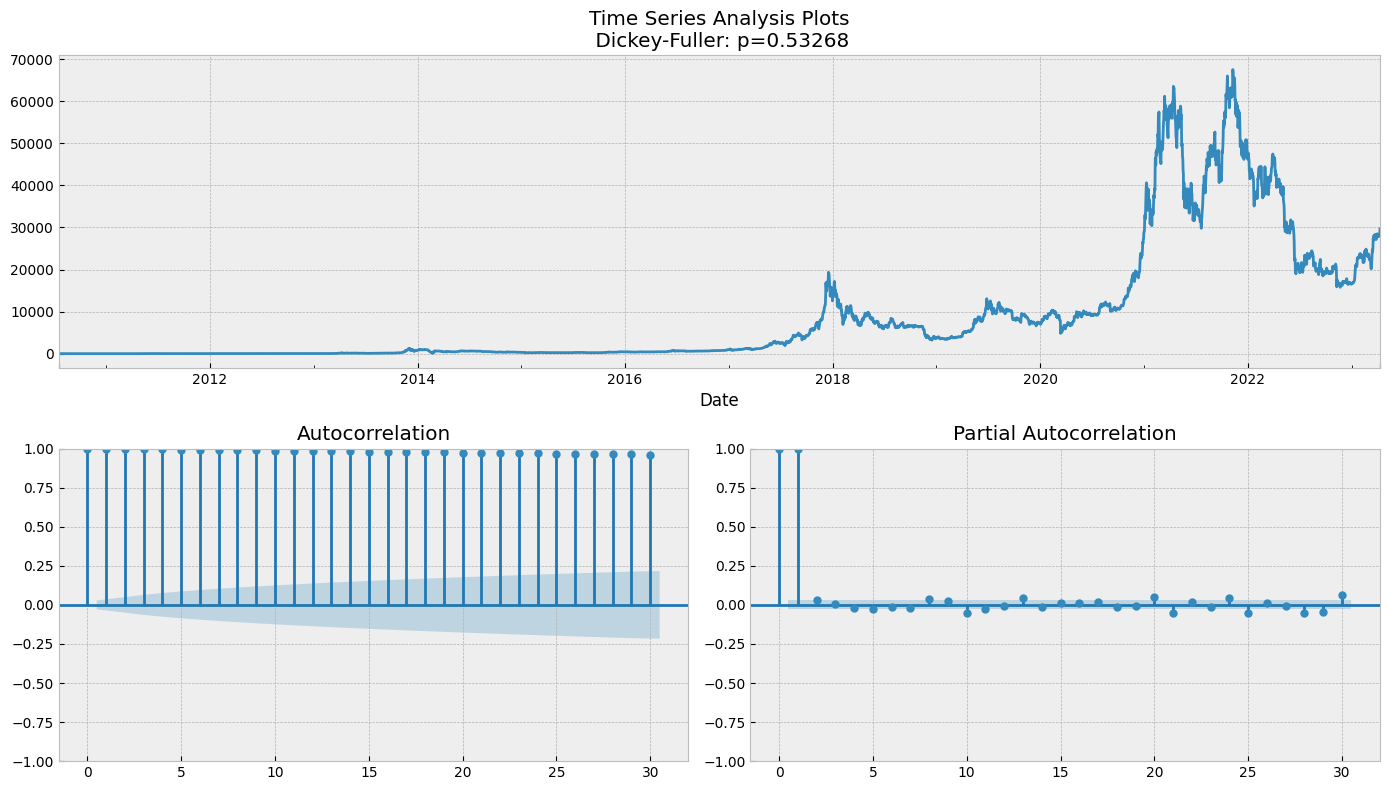

In [48]:
tsplot(df.Open, lags=30)

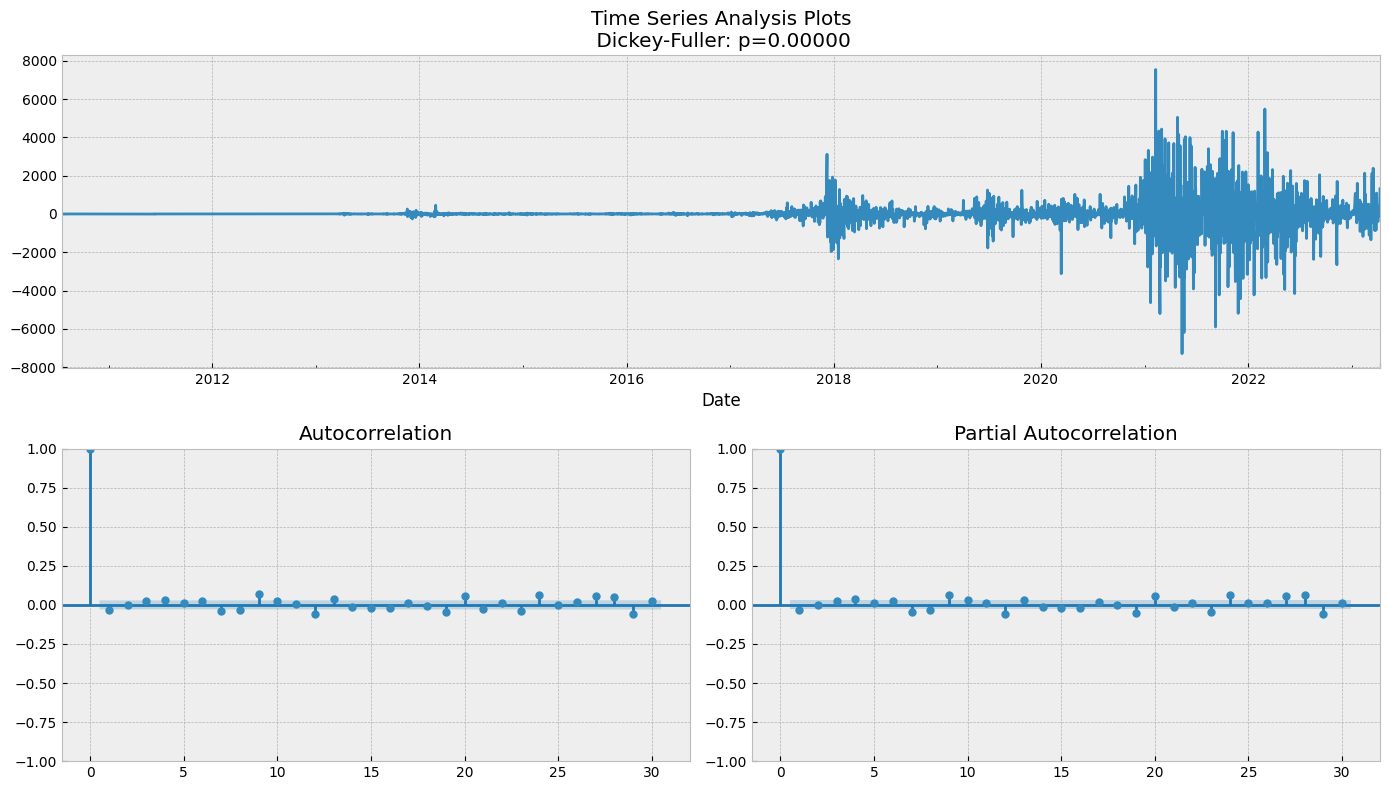

In [49]:
data = df.copy(deep=False)
data1 = df.copy(deep=False)
data1.Open = data1.Open - data1.Open.shift(1)
tsplot(data1.Open[1:], lags=30)

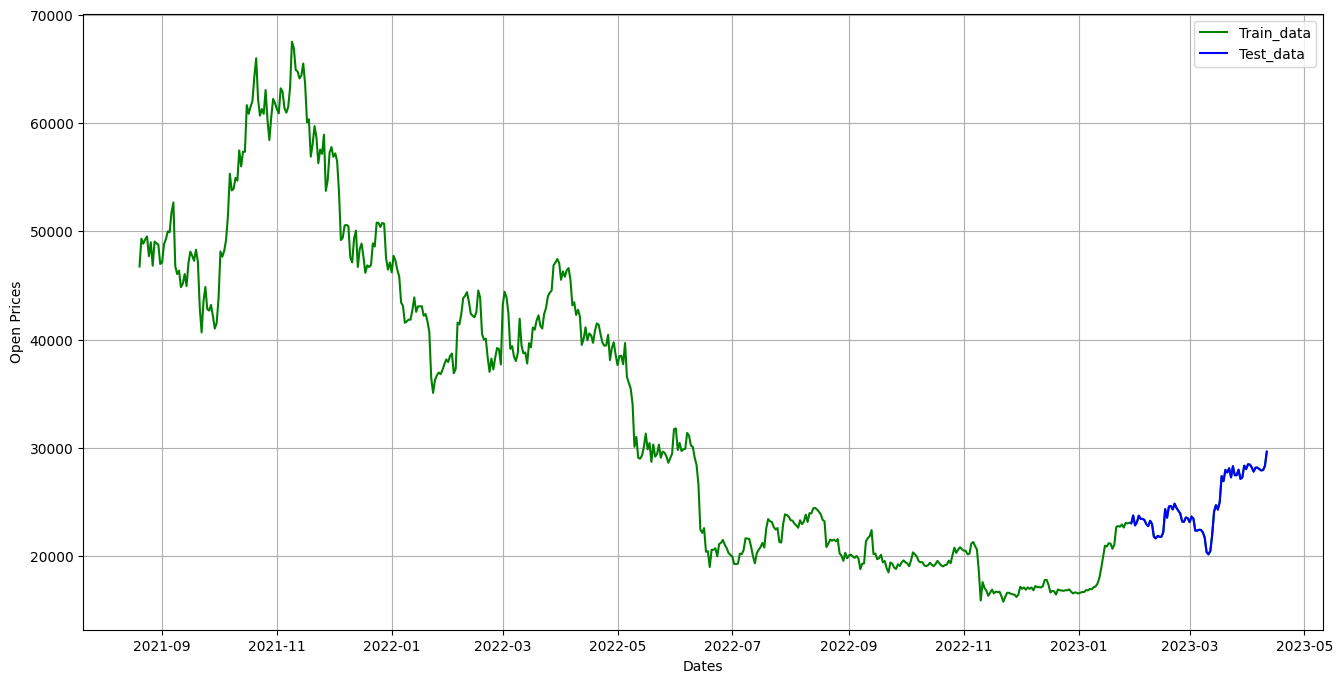

In [50]:
train_data, test_data = data[1:-73], data[-73:]
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open Prices')
plt.plot(data['Open'].tail(600), 'green', label='Train_data')
plt.plot(test_data['Open'], 'blue', label='Test_data')
plt.legend()
plt.show()


In [51]:
#Mean Value plot

In [52]:
mean_value = data['Open'].mean()

mean_value

8917.643216512579

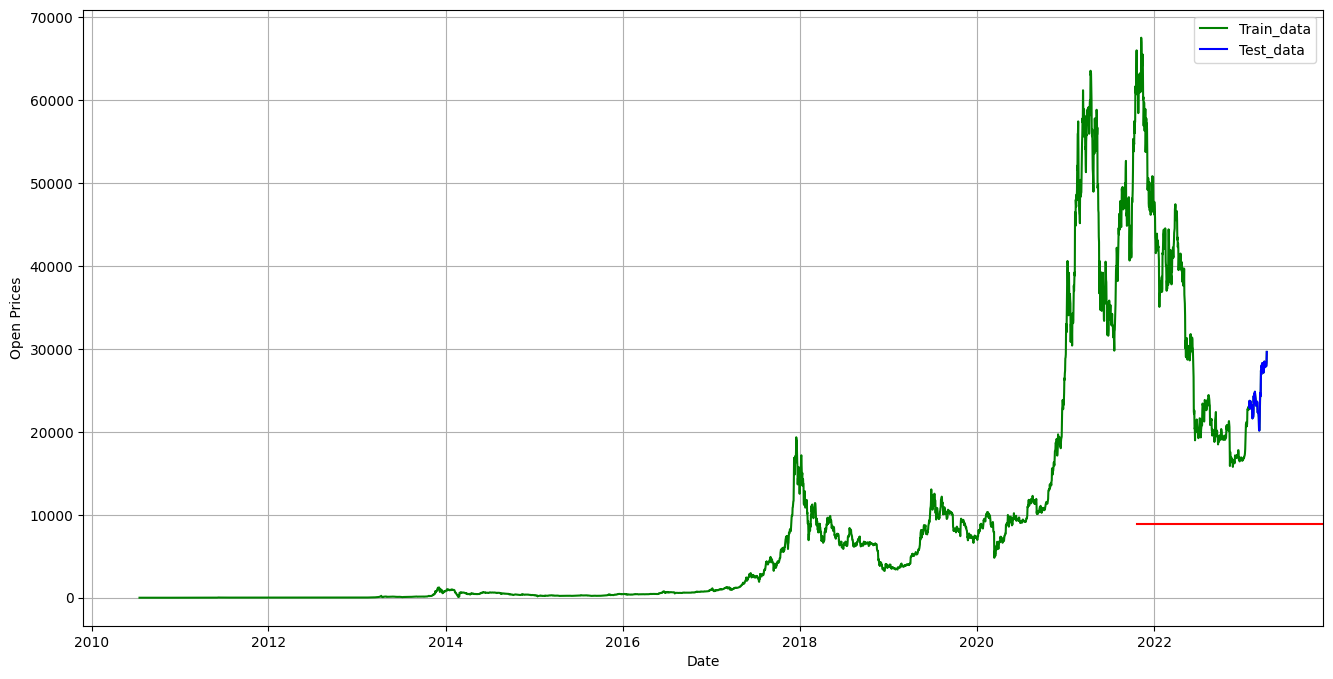

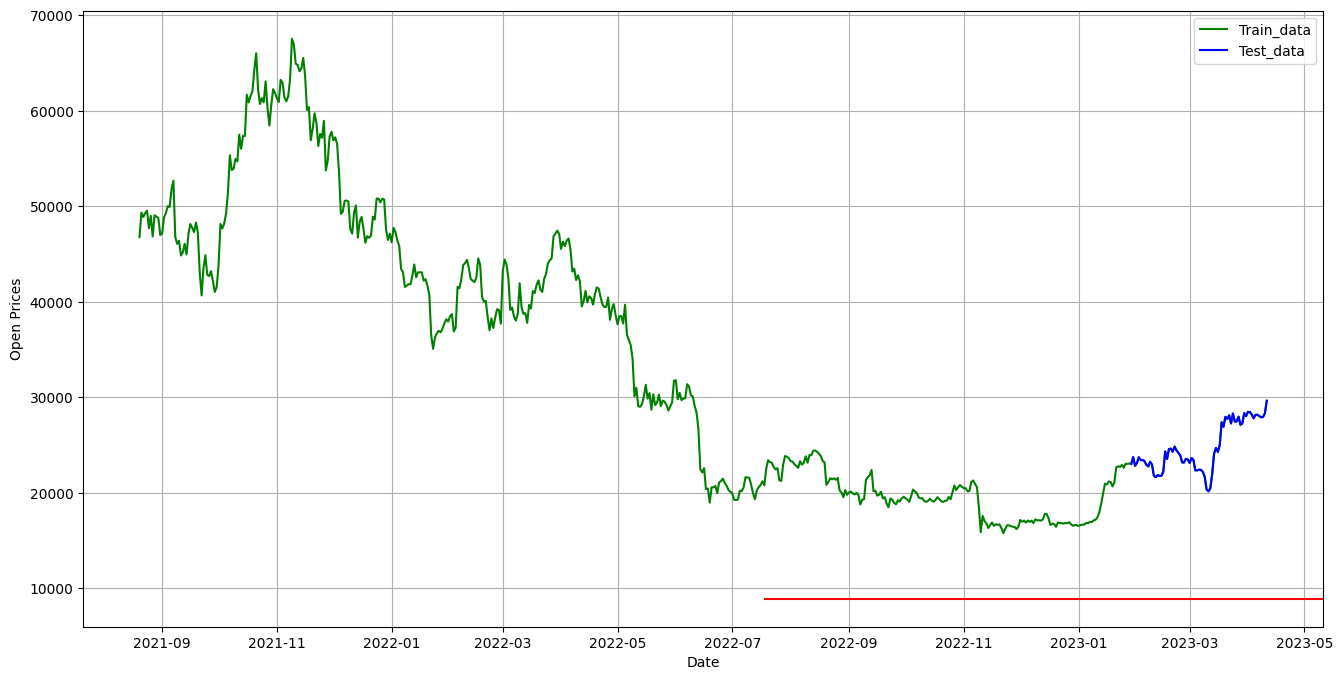

In [53]:
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Open Prices')
plt.plot(data['Open'], 'green', label='Train_data')
plt.plot(test_data['Open'], 'blue', label='Test_data')
plt.axhline(y=mean_value, xmin = 0.85, xmax=1, color='red')
plt.legend()

plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Open Prices')
plt.plot(data['Open'].tail(600), 'green', label='Train_data')
plt.plot(test_data['Open'], 'blue', label='Test_data')
plt.axhline(y=mean_value, xmin = 0.55, xmax=1, color='red')
plt.legend()
plt.show()

In [54]:
print('MSE:' + str(mean_squared_error(test_data['Open'], np.full(len(test_data), mean_value))))
print('MAE:' + str(mean_absolute_error(test_data['Open'], np.full(len(test_data), mean_value))))
print('RMSE:' + str(sqrt(mean_squared_error(test_data['Open'], np.full(len(test_data), mean_value)))))

MSE:256273977.76540428
MAE:15808.871851980572
RMSE:16008.559515628016


In [55]:
#Model Building and Validation
#Autoregressive model

In [56]:
train_ar = train_data['Open']
test_ar = test_data['Open']

from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(train_ar, lags=31)
model_fit = model.fit()


d:\SHR\Django\MLTrian\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [57]:
print(model_fit)
window = len(model_fit.fittedvalues)
coef = model_fit.params

In [58]:
coef

const       13.873933
Open.L1      0.976154
Open.L2      0.026798
Open.L3      0.024934
Open.L4     -0.004274
Open.L5     -0.001437
Open.L6     -0.001637
Open.L7     -0.073786
Open.L8      0.025063
Open.L9      0.106003
Open.L10    -0.044299
Open.L11    -0.032947
Open.L12    -0.056215
Open.L13     0.089174
Open.L14    -0.051516
Open.L15    -0.010528
Open.L16     0.016357
Open.L17     0.028825
Open.L18    -0.027778
Open.L19    -0.043994
Open.L20     0.121282
Open.L21    -0.082212
Open.L22     0.021581
Open.L23    -0.050481
Open.L24     0.103235
Open.L25    -0.049325
Open.L26     0.004046
Open.L27     0.044014
Open.L28     0.000093
Open.L29    -0.117803
Open.L30     0.068128
Open.L31    -0.008536
dtype: float64

In [59]:
window=31

In [60]:
history = train_ar[len(train_ar) - window:]
history = [history[i] for i in range(len(history))]

C:\Users\Rostami_pc\AppData\Local\Temp\ipykernel_18596\222953650.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [61]:
predictions = list()
for t in range(len(test_ar)):
    length = len(history)
    lag = [history[i] for i in range(length-window, length)]
    yhat = coef[0]
    
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    
    obs = test_ar[t]
    predictions.append(yhat)
    history.append(obs)    

C:\Users\Rostami_pc\AppData\Local\Temp\ipykernel_18596\775408039.py:5: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\Rostami_pc\AppData\Local\Temp\ipykernel_18596\775408039.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\Rostami_pc\AppData\Local\Temp\ipykernel_18596\775408039.py:10: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Lag: Date
2010-08-19       13.973825
2010-08-20       13.973825
2010-08-21       13.973825
2010-08-22       13.973825
2010-08-23       13.973825
                  ...     
2023-01-24    22812.733917
2023-01-25    22906.047658
2023-01-26    22683.983199
2023-01-27    23045.634929
2023-01-28    22837.141312
Length: 4546, dtype: float64


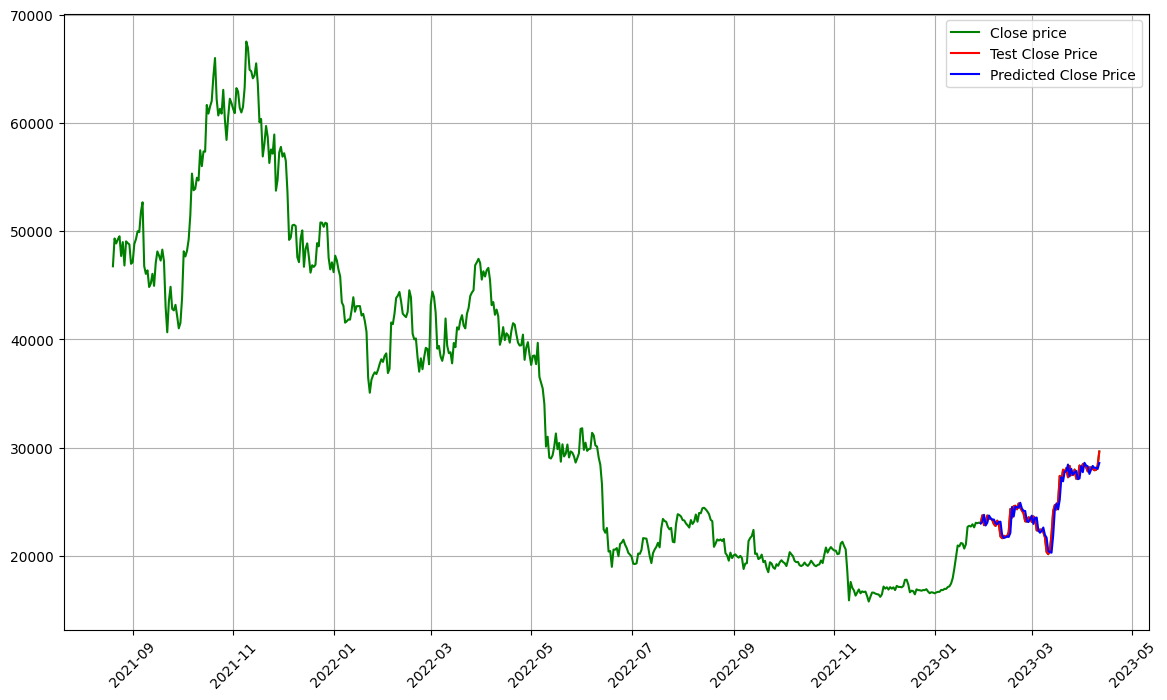

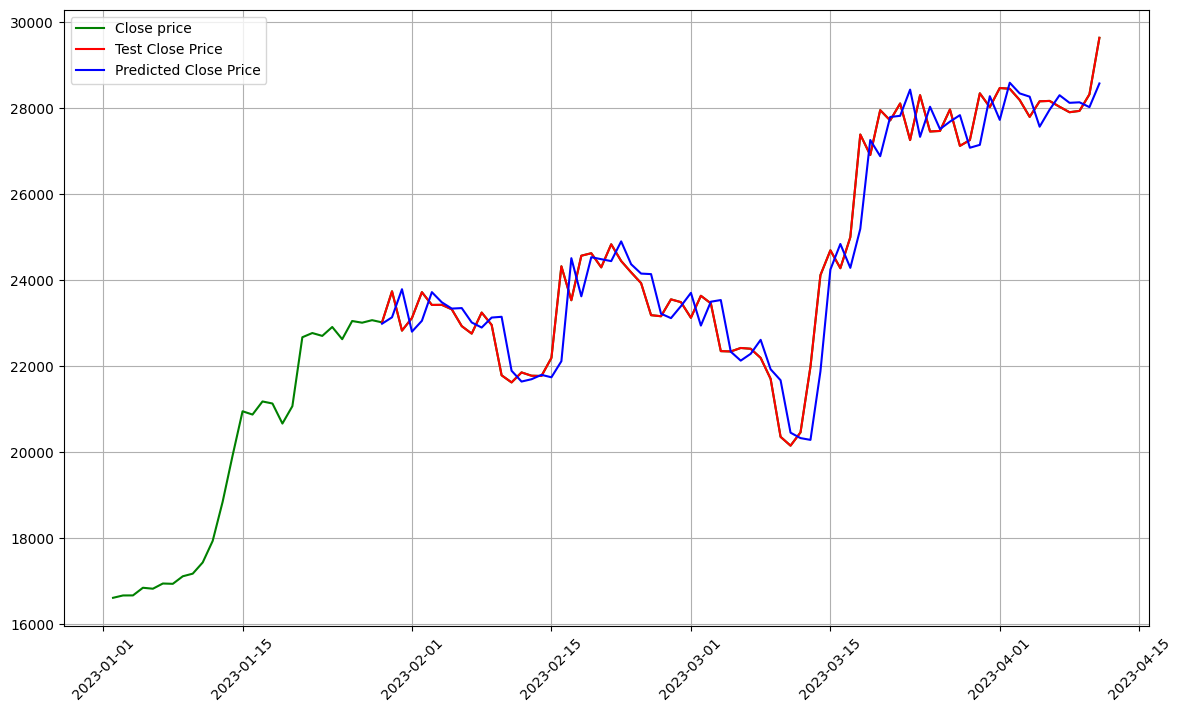

In [62]:
plt.figure(figsize=(14,8))
plt.plot(data.index[-600:], data['Open'].tail(600), color='green', label = 'Close price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Test Close Price')
plt.plot(test_data.index, predictions, color='blue', label='Predicted Close Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

plt.figure(figsize=(14,8))
print('Lag: %s' % model_fit.fittedvalues)
plt.plot(data.index[-100:], data['Open'].tail(100), color='green', label = 'Close price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Test Close Price')
plt.plot(test_data.index, predictions, color='blue', label='Predicted Close Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

In [63]:
print('MSE:' + str(mean_squared_error(test_data['Open'], predictions)))
print('MAE:' + str(mean_absolute_error(test_data['Open'], predictions)))
print('RMSE:' + str(sqrt(mean_squared_error(test_data['Open'], predictions))))

MSE:543557.760051567
MAE:526.8307231571525
RMSE:737.263697771406


In [64]:
#Moving Average Model

In [66]:
#import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
# model = sm.tsa.arima.ARIMA(train_data, order=(1,1,2))
# result = model.fit()

train_ma = train_data['Open']
test_ma = test_data['Open']

history = [x for x in train_ma]
y = test_ma


predictions=list()
model = ARMA(history, order=(0,8))
model_fit = model.fit(disp=0)
yhat = model_fit.forecast()[0]
predictions.append(yhat)

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [67]:
history.append(y[0])
for i in range(1, len(y)):
    model = ARMA(history, order=(0,8))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    obs = y[i]
    history.append(obs)

C:\Users\Rostami_pc\AppData\Local\Temp\ipykernel_18596\85548836.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [ ]:
plt.figure(figsize=(14,8))
plt.plot(data.index[-600:], data['Open'].tail(600), color='green', label = 'Train Stock price')
plt.plot(test_data.index, y, color='red', label='Real Close Price')
plt.plot(test_data.index, predictions, color='blue', label='Predicted Stock Price')
plt.grid(True)
plt.legend()

plt.figure(figsize=(14,8))
plt.plot(data.index[-100:], data['Open'].tail(100), color='green', label = 'Train Stock price')
plt.plot(test_data.index, y, color='red', label='Real Stock Price')
plt.plot(test_data.index, predictions, color='blue', label='Predicted Stock Price')
plt.grid(True)
plt.legend()
plt.show()